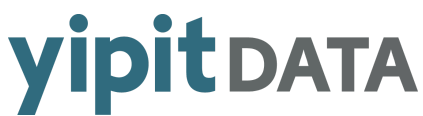

### Loading & Importing

In [1]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#importing data
df = pd.read_excel('NFLX_DS_data_8_22.xlsx', sheet_name=None)

#print sheet names
print(df.keys())

#importing all sheets
nflx_df = pd.read_excel('NFLX_DS_data_8_22.xlsx', sheet_name='NFLX Top 10')
imdb_df = pd.read_excel('NFLX_DS_data_8_22.xlsx', sheet_name='IMDb Rating')
runtime_df = pd.read_excel('NFLX_DS_data_8_22.xlsx', sheet_name='Runtime')

dict_keys(['NFLX Top 10', 'IMDb Rating', 'Runtime'])


### Understanding Data

In [2]:
#library containing all dfs
all_sheets = {'nflx_df':nflx_df,
              'imdb_df':imdb_df,
              'runtime_df':runtime_df}

In [3]:
#look at shape for all dfs
def shape(df):
    return df.shape

pd.Series(all_sheets).apply(shape)

nflx_df        (1440, 8)
imdb_df       (15756, 2)
runtime_df    (15756, 2)
dtype: object

In [4]:
#check data type for each column of each df
def dtype(df):
    return df.dtypes

pd.Series(all_sheets).apply(dtype)

#columns seem to have the correct data types
#NaN values are to be ignored

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating,runtime
nflx_df,object,int64,int64,object,int64,object,datetime64[ns],datetime64[ns],NaN,NaN,NaN
imdb_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,float64,NaN
runtime_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,NaN,int64


In [5]:
#checking first 5 observations

def head(df):
    return df.head()

[head(df) for df in (nflx_df, imdb_df,runtime_df)]

[           category  cumulative_weeks_in_top_10  weekly_hours_viewed  \
 0   Films (English)                           2            129110000   
 1   Films (English)                           1             20480000   
 2  TV (Non-English)                           1             10140000   
 3      TV (English)                           2             58960000   
 4      TV (English)                           5             10480000   
 
               season_title  weekly_rank                         show_title  \
 0                      NaN            1                         Red Notice   
 1                      NaN            2  There's Someone Inside Your House   
 2          Elite: Season 2            8                              Elite   
 3  Love Is Blind: Season 2            2                      Love Is Blind   
 4   All American: Season 3            9                       All American   
 
   date_added       week  
 0 2022-01-04 2021-11-21  
 1 2022-01-04 2021-10-10  
 2 

In [6]:
#checking N/A values
def isna(df):
    return df.isna().sum()

pd.Series(all_sheets).apply(isna)

#nflx: 732 n/a in season_title
#imdb & runtime: 1310 missing in title

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating,runtime
nflx_df,0.0,0.0,0.0,732.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
imdb_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1310.0,0.0,NaN
runtime_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1310.0,NaN,0.0


In [7]:
#check how many duplicate obs there are
def dupe(df):
    return df.duplicated().sum()

pd.Series(all_sheets).apply(dupe)

nflx_df          0
imdb_df       1249
runtime_df    1171
dtype: int64

In [8]:
#checking dupes
imdb_df[imdb_df.duplicated()]

#dupes seem to be all N/A, so we can check to see if non-N/A values are duped
imdb_df[imdb_df.duplicated()].dropna()
#yep

,title,rating
3399,People You May Know,5.6
7201,The Girl with the Dragon Tattoo,7.8
7912,Kingdom,8.4
9343,Emma,6.7
11533,Bad Education,7.4
13942,The Exorcist,8.0
13961,Dear White People,6.1
14571,The Promise,6.0
15306,Nova,0.0
15622,The Girl on the Train,4.4


In [9]:
#are there duped titles with different runtimes?
imdb_df[imdb_df['title'].duplicated()].dropna()
#also yep

,title,rating
421,Wanted,7.6
518,Sergio,6.2
539,GTO: Great Teacher Onizuka,8.5
554,Halloween,7.7
755,Fruits Basket,7.9
...,...,...
15679,Joy,6.6
15681,Connected,7.5
15697,Max Steel,6.8
15698,Déjà Vu,8.0


### Responses

In [10]:
#remove scientific notation format
pd.options.display.float_format = '{:.2f}'.format

#showing column names for nflx
nflx_df.columns

Index(['category', 'cumulative_weeks_in_top_10', 'weekly_hours_viewed',
       'season_title', 'weekly_rank', 'show_title', 'date_added', 'week'],
      dtype='object')

#### Identify the TV show (English) with the most appearances in the top 10 list (you can treat each row in the data as a separate appearance). What were the average weekly viewed hours for that show across all appearances?

In [11]:
#find categories
nflx_df.category.unique()

array(['Films (English)', 'TV (Non-English)', 'TV (English)',
       'Films (Non-English)'], dtype=object)

In [12]:
#top TV show (ENG) with most appearances in top 10 list (cumulative_weeks_in_top_10)

q1 = (nflx_df[nflx_df['category']=='TV (English)']
.nlargest(1, 'cumulative_weeks_in_top_10')[['show_title',
                                             'cumulative_weeks_in_top_10',
                                             'weekly_hours_viewed']]
.reset_index()
.drop(['index'],axis=1)
    
)


#average weekly hours viewed for that show across all appearances
q1["ALL_average_weekly_hours_viewed"] = nflx_df.groupby('show_title')['weekly_hours_viewed'].transform('mean')

q1

,show_title,cumulative_weeks_in_top_10,weekly_hours_viewed,ALL_average_weekly_hours_viewed
0,Maid,13,8750000,34607692.31


#### For the "Films (Non-English)" category, identify the film with lowest IMDb rating. What were the average weekly hours viewed for that film?

In [13]:
#join imdb & nflx
imdb_nflx = pd.merge(imdb_df, nflx_df, left_on='title', right_on='show_title', how='right')

imdb_nflx.head()

,title,rating,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Red Notice,6.30,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,There's Someone Inside Your House,4.80,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,Elite,7.40,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,Love Is Blind,6.10,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,Love Is Blind,5.10,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20


In [14]:
# Non-ENG film with lowest IMDb (rating)

q2 = (imdb_nflx[imdb_nflx['category']=='Films (Non-English)']
.nsmallest(1,'rating',keep='all')[['show_title',
                              'rating',
                              'weekly_hours_viewed']]

)


#there are 37 titles with a rating of 0 with 14 duplicates


#average weekly hours viewed for these shows across all appearances
q2["average_weekly_hours_viewed"] = imdb_nflx.groupby('show_title')['weekly_hours_viewed'].transform('mean')


#drop duped titles
q2.drop_duplicates(subset=['show_title']).reset_index().drop(['index'],axis=1)

,show_title,rating,weekly_hours_viewed,average_weekly_hours_viewed
0,Fierce,0.00,1250000,1525000.00
1,Sinkhole,0.00,2260000,2260000.00
2,Lassie Come Home,0.00,1410000,1410000.00
3,Words Bubble Up Like Soda Pop,0.00,2180000,2180000.00
4,Mimi,0.00,1510000,4366000.00
5,Friendzone,0.00,3340000,4522000.00
6,O Candidato Honesto,0.00,1280000,1280000.00
7,Luccas Neto in: The Magical Hotel 2,0.00,2060000,2060000.00
8,Two,0.00,6000000,5510000.00
9,Intervenção,0.00,3650000,3650000.00


#### Identify the film in the “Films (English)” category with the most cumulative weeks in the top 10. How could you approximate how many users watched this show? What assumptions would you make? What risks are there to your approach?

In [15]:
#merge runtime together with previous df to make a complete df
runtime_nflx = pd.merge(runtime_df, nflx_df, left_on='title', right_on='show_title', how='right')

print(runtime_nflx.shape) #1497 obs 

runtime_nflx.head()

(1497, 10)


,title,runtime,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Red Notice,118,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,There's Someone Inside Your House,96,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,Elite,60,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,Love Is Blind,89,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,Love Is Blind,48,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20


In [52]:
#top Film (ENG) with most cumulative weeks in top 10 list (cumulative_weeks_in_top_10)

q3 = (runtime_nflx[runtime_nflx['category']=='Films (English)']
.nlargest(1, 'cumulative_weeks_in_top_10')[['show_title',
                                            'cumulative_weeks_in_top_10',
                                             'runtime',
                                             'weekly_hours_viewed']]
.reset_index()
.drop(['index'],axis=1)
    
)


#find average number of users who watched the film

#OPTION 1: average based on the the first returned observation (not including duplicates for same title)
q3["average_viewers_no_dupes"] = q3["weekly_hours_viewed"]/q3["runtime"]


#OPTION 2: average based on all titles of the same name
red_notice = runtime_nflx.loc[(runtime_nflx['show_title']=='Red Notice')]

q3["weekly_hours_viewed_TOTAL"] = red_notice['weekly_hours_viewed'].sum()
q3["average_viewers_with_dupes"] = q3["weekly_hours_viewed_TOTAL"]/q3["runtime"]

q3

,show_title,cumulative_weeks_in_top_10,runtime,weekly_hours_viewed,average_viewers_no_dupes,weekly_hours_viewed_TOTAL,average_viewers_with_dupes
0,Red Notice,13,118,4970000,42118.64,449900000,3812711.86


#### If you plot weekly hours viewed over time (as an aggregate and for each of the four categories), what trends do you notice?

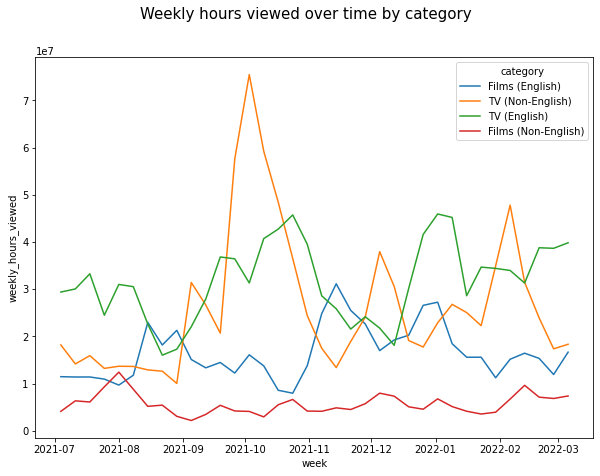

In [133]:
#one graph for every category
fig, ax = plt.subplots(figsize=(10,7))
q4_cats = sns.lineplot(x="week",y="weekly_hours_viewed", 
                  hue="category", 
                  ci=None, 
                  data=nflx_df)
fig.suptitle('Weekly hours viewed over time by category',size=15)
plt.show()

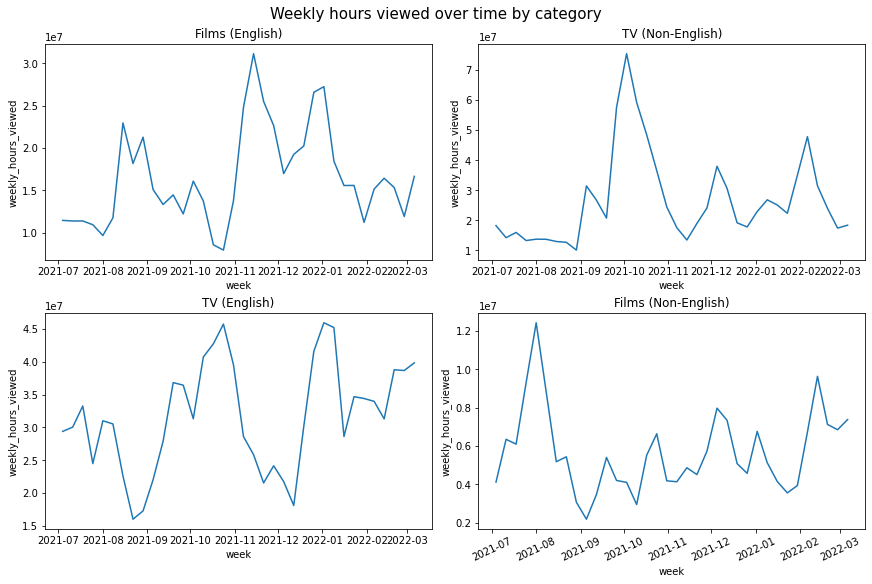

In [126]:
#separate graphs per category
fig,ax = plt.subplots(2, 2,
                     figsize=(12,8),
                     constrained_layout = True)
q4_g1 = sns.lineplot(x="week",
                     y="weekly_hours_viewed", 
                     data=nflx_df.loc[(nflx_df['category']=='Films (English)')],
                     ci=None,
                     legend=False,
                     ax=ax[0][0]).set(title='Films (English)')
q4_g2 = sns.lineplot(x="week",
                     y="weekly_hours_viewed", 
                     data=nflx_df.loc[(nflx_df['category']=='TV (Non-English)')],
                     ci=None,
                     legend=False,
                     ax=ax[0][1]).set(title='TV (Non-English)')
q4_g3 = sns.lineplot(x="week",
                     y="weekly_hours_viewed", 
                     hue="category", data=nflx_df.loc[(nflx_df['category']=='TV (English)')],
                     ci=None,
                     legend=False,
                     ax=ax[1][0]).set(title='TV (English)')
q4_g4 = sns.lineplot(x="week",
                     y="weekly_hours_viewed", 
                     hue="category", data=nflx_df.loc[(nflx_df['category']=='Films (Non-English)')],
                     ci=None,
                     legend=False,
                     ax=ax[1][1]).set(title='Films (Non-English)')
fig.suptitle('Weekly hours viewed over time by category',size=15)
plt.xticks(rotation = 25)
plt.show()

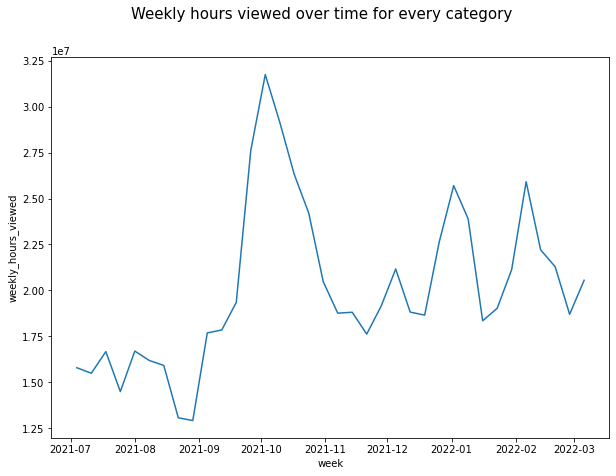

In [134]:
#overall weekly hours viewed
fig, ax = plt.subplots(figsize=(10,7))
q4_tot = sns.lineplot(x="week",y="weekly_hours_viewed",  
                  ci=None, 
                  data=nflx_df)
fig.suptitle('Weekly hours viewed over time for every category',size=15)
plt.show()

In [43]:
runtime_copy = runtime_df.dropna()
print(runtime_copy.shape) #14,446 obs (1310 n/a removed)

imdb_copy = imdb_df.dropna()
print(imdb_copy.shape) #14,446 obs (1310 n/a removed)

runtime_imdb = pd.merge(runtime_copy, imdb_copy, left_on='title', right_on='title', how='inner')
runtime_imdb.shape #15210, merging is "wrong" due to duplicate observations on both IMDb and runtime

(14446, 2)
(14446, 2)


(15210, 3)